In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Motivation

Autoencoders, while not novel in machine learning, have seen a significant upswing in recent years due to their powerful capabilities and adaptability. In the current landscape of advancing models like [diffusion models](https://en.wikipedia.org/wiki/Diffusion_model), comprehension of autoencoders has become a bedrock for those wanting to learn about the latest models.

Welcome to the initial entry in a blog series on autoencoders, where the aim is to translate complex concepts into simple, easy-to-understand explanations. We will largely avoid complex code and mathematical jargon in this post, focusing instead on nurturing your intuition around the core concepts that make autoencoders so fascinating. Subsequent entries will become more technical, building upon the ideas established here.

### Autoencoders Structure

Autoencoders represent a distinct category of neural networks, designed to condense input data and subsequently reconstruct it with high accuracy. This clever design includes two interconnected networks working collaboratively. Though the connection of two networks essentially forms a single network, viewing these as separate units is beneficial when first learning about their functionality.

The encoder and the decoder, nearly mirrored entities, make up these two units. The encoder's task is to compress the input data into a compact form, while the decoder undertakes the decompression and reconstruction of this compressed data back to its original shape. The central layer sitting between the encoder and decoder will be an important aspect of the network to understand.

![Diagram of a basic Autoencoder (source: [Wikipedia](https://en.wikipedia.org/wiki/Autoencoder))](../media/images/Autoencoder_schema.png){#fig-autoencoder_schema width="450"}

### Applications of Autoencoders

Autoencoders find utility in a wide range of applications such as:

- Data Compression: The encoder of an autoencoder can compress an image file size, leading to faster sharing speeds for anyone with the relevant decoder. The effectiveness of this over traditional compression methods is largely dependent on the use case.

- Image Reconstruction and Noise Reduction: From eliminating graininess or watermarks in images to advanced models for anomaly detection and generative modeling, autoencoders have found numerous applications.

- Generative Modeling: Autoencoders play a critical role in generating new data, such as novel images or audio. An example can be seen in [Latent Diffusion Models](https://arxiv.org/pdf/2112.10752.pdf) that generate images based on text prompts or deepfakes where a person's face is generated by the model. [Variational Autoencoders](https://en.wikipedia.org/wiki/Variational_autoencoder), a more complex variant of autoencoders, are often employed in such advanced applications, something we will explore in future posts.

:::{layout="[[1,1],[1, 1.5]]" layout-valign="bottom" #fig-autoencoder_example_uses}
![Denoising Example - Original (top), original with noise(middle), de-noised reconstruction (bottom)](../media/images/denoising_example.png)

![Watermark Removal Example - Original (top), original with watermark (middle), no watermark reconstruction (bottom)](../media/images/watermark_removal_example.png){height="250"}

![Diffusion Model Image Generation (source: [harvard.edu](https://scholar.harvard.edu/binxuw/classes/machine-learning-scratch/materials/stable-diffusion-scratch))](../media/images/diffusion_proc1.gif)

![Deepfake of Tom Cruise (created by the talented [Chris Ume](https://www.youtube.com/watch?v=wq-kmFCrF5Q))](../media/images/deepfake_tom_miles.gif)

Example use cases of autoencoders
:::

## An Autoencoder Example

Throughout this blog post, we will use a basic autoencoder model as an example. The goal is to use this example throughout the blog post as an anchor to which we can attach new concepts as we learn them.

This particular autoencoder can compresses and reconstruct images from the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) (@fig-mnist_examples) which consists of 28x28 pixel, black and white images of handwritten digits from 0 to 9. The pixel values range from 0-1 where 1=white, 0=black (though it doesn't matter which way round you represent the colours) and any shade of grey will be a value between the two.

![Images from the MNIST dataset](../media/images/mnist_examples.png){#fig-mnist_examples}



@fig-mnist_reconstruction_example shows a handwritten digit that was reconstructed by the autoencoder model we will be using. The reconstruction is (purposefully) not perfect to highlight that it is a reconstruction.

![MNIST image reconstruction](../media/images/linear_autoencoder_reconstruction.png){#fig-mnist_reconstruction_example}

Now that we've set up our example, let's explore the first concept: data compression.

## Data compression: Retaining the Core Information


To fully comprehend autoencoders, it is helpful to grasp the concept of data compression. The goal of a compression algorithm is to reduce the size of data with minimal loss of information.

The first clarification to make on compression is the following: compression of data means removing data. It is the only way to reduce the size of a file. The skill is in deciding what data to remove such that it is easy to add it back in when you decompress the data. 

### A compression analogy

Imagine you are with a friend and you are tasked with manually copying strings of data from one piece of paper to another. The strings of data look like this:

```
AAARRBBBBMMMMMMMPPPEYYYYYBBBBBBBUUIIIIIIIII
WWWAAAAAAAAAAATTTTNQQQQQQUJJNNNNNNRRRRRRRRR
UUKLLLLLLLLFGHSSSSSSZZZZZZZZZZZZZZZZGGGGGGG
...
etc.
```
There are a lot of strings to copy so you want to be efficient in this process. You decide for find a quicker way of passing the information to each other.

You assign yourselves different roles: your friend will read the strings and you will write them down. As the reader, your friend decides to use an algorithm in order to shorten the amount of data they need to pass to you. They count the number of times each letter repeats and pass you that number along with the corresponding letter.

For example:
```
AAARRBBBBMMMMMMMPPPEYYYYYBBBBBBBUUIIIIIIIII
```
becomes
```
3A2R4B7M3P1E5Y7B2U9I
```
What your friend is doing is "encoding" the strings of data. This particular encoding is compressing the data into a smaller form in a way that it can be perfectly reproduced - this is called "lossless" compression. Your friend is acting as an "Encoder" (sidenote: when a reconstruction is not perfect, we call this "lossy" compression. The `jpeg` file format for images is an example of a lossy compressed format. It makes the image size smaller but loses some image quality).

Your role is to "decode" the information back into it's original form. You are a "Decoder". All you need to do is know the algorithm your friend used to encode that data and do the reverse.

While this is a straightforward example, why this works generalises to any situation. We can afford to reduce the amount of bits of data because we found a more efficient way to express the same information with fewer bits (using only one number followed by one letter per repeating sequence). The observation we made was that letters tend to repeat themselves, and we can take advantage of that.

To compress and decompress data, the algorithm must possess an adequate understanding of the rules of redundancy in the given data. As humans, we have a lot of pre-existing knowledge and can spot simple patterns this which we can use to design our algorithms. We can tell it would be more efficient to use a single letter and number.
If the sequence had been single letter sequences (eg `AEJGOSKA`), we know that this method would have been less efficient as we would need twice as much information (`1A1E1J1G1O1S1K1A`).

This example used letters for the data type but given all things on computers are numbers, compression will work with anything; images, audio, video, text etc.

In most real-world scenarios, there is significantly more data involved, and the relationships are not as easily discernible by a human, leading to more complex algorithms with more intricate pre-existing knowledge. We either need a smart human or a computer to figure out the algorithm for us (this is where autoencoders come in).

### Autoencoder Compression with MNIST example

Autoencoders work differently than general compression algorithms:

- The algorithm is not designed by humans: autoencoders are neural networks, and the compression and decompression algorithm is developed by the network itself. While humans do have some input in determining far to compress the data, the autoencoder must figure out how to make that work. This is where the "auto" in "autoencoder" comes from.
- The algorithm is task-specific: autoencoders are trained on specific data and learn to compress data that is similar in nature. They can excel at compressing particular types of data, but they do not generalize beyond the data provided. If they are only fed images of cars, they won't compress images of flowers effectively. However, if given both images of cars and flowers, they could handle both.

Let's have another look at the architechture of our image autoencoder (@fig-autoencoder_schema_example). Notice there are 2 parts: an encoder at the input that compresses data `X` (the image) into `h`, the middle layer (a compressed form of `X`), and a decoder at the output that attempts to reconstruct `X` using only `h` to produce `X'`. 

![Autoencoder Schema with example data](../media/images/Autoencoder_schema_with_example_2d_latent.png){#fig-autoencoder_schema_example width="450"}

Our specific autoencoder has been designed to compress any 28x28 pixel image into 2 values (@fig-compressed_image_form). This means we are going from `28x28=784` values down to 2, so this is a significant reduction. Notice how we have a negative value for one of the pixels - these numbers longer represent pixel values in the same way. We say that the compressed form of the image is 2-dimensional.

![Example compressed image to only 2 values](../media/images/2d_latent_compressed_form.png){#fig-compressed_image_form}

## Compression is dimensionality reduction

Autoencoders have uses beyond just compression, but compression is integral to any autoencoder task. In essence, compression functions as a form of dimensionality reduction, simplifying the data by decreasing the number of its features or categories.

To explain further, dimensionality reduction simply means that we decrease the number of categories (or features) in our data. For instance, when dealing with an image, this corresponds to a reduction in pixel values. Consider the MNIST images, which are visualized on a grid of 28x28 pixels (@fig-mnist_examples). When we "flatten" the image, we end up with 28x28=784 features, each pixel being a feature required to compose the digit.

This number of pixels – 784 – can be thought of as the dimension size of the data. Here, the first dimension corresponds to the pixel value in the top left corner, while the 784th pixel represents the bottom rightmost pixel. @fig-orig_v_flattened provides a visual representation of a 50-pixel section from a "flattened" MNIST image, with purple pixels highlighting the corresponding positions between the unflattened and flattened images.

When pixels are rendered as an image, they are treated independently; we assign color to each pixel based on its value, irrespective of other pixels. However, the pixels within an image are not truly independent - if they were, we wouldn't recognize the image. Two hand-drawn "4"s, despite their differences, can still be recognized as the same number. This interdependence of pixels, seen in all but random noise, is precisely the property we leverage to reduce an image's dimensionality.

:::{layout="[[2,1]]" layout-valign="bottom" #fig-orig_v_flattened fig-align="center"}
![(a)](../media/images/linear_autoencoder_reconstruction_2d_latent_orig.jpg)

![(b)](../media/images/linear_autoencoder_orig_2d_latent_flat.png){width="20"}

\(a) Original MNIST image (b) 50px section of flattened MNIST image
:::

Let's examine the code that defines our autoencoder's architechture to understand how it reduces the dimensionality of the data. The code below uses the [Pytorch](https://pytorch.org) library to define the model layers.

The important lines of code involve the `Linear()` function (a [linear layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)), which essentially takes us from a dimension of size $a$ to a dimension of size $b$ via `Linear(a,b)`.

We will not discuss the maths behind the `Linear()` function here as it is unnecessary for a first pass at understanding autoencoders.

```python
         self.encoder = torch.nn.Sequential(
            Linear(28 * 28, 128),
            # ReLU(),
            Linear(128, 64),
            # ReLU(),
            Linear(64, 32),
            # ReLU(),
            Linear(32, 2),
         )

         self.decoder = torch.nn.Sequential(
            Linear(2, 32),
            # ReLU(),
            Linear(32, 64),
            # ReLU(),
            Linear(64, 128),
            # ReLU(),
            Linear(128, 28 * 28),
            # Sigmoid(),
         )
```


This architecture follows the same basic design as @fig-autoencoder_schema shows.
The encoder part of the model (`self.encoder`) reduces the data's dimension through these linear layers, little by little: `28*28 -> 128 -> 64 -> 32 -> 2`. The compressed representation ends up being 2 pixels wide (2-dimensional) after the final `Linear` function `Linear(32, 2)`. 

The decoder (`self.decoder`) defines the same process as the encoder, but in reverse: linear layers go from smallest dimension (the middle layer) back to the original dimension of the image: `2 -> 32 -> 64 -> 128 -> 28*28`. This is where the image reconstruction happens.

How is 2 pixels worth of information enough to reconstruct an image back to 784 pixels? 

- Consider the obvious redundant information in the image - there's a lot of empty space around the digits.
- Digits are built from similar shapes such as loops and lines. If the autoencoder knows the image it is trying to construct consists of two loops, it's probably an 8. That already provides significant context for how the image will look.
- The two values we are left with are not just pixel values like in the original image, they are interdependent. A change in the values in one dimension will affect the values in the other.
- The reconstruction is lossy, so we are allowing for errors in the reconstruction to allow for a smaller size compressed image.

Most importantly, the "prior experience" contains a lot of the information needed for the reconstruction. It is held in the model's weights. The model weights define what is know as the **latent space**, these are the combination of functions (in our example, the `Linear()` functions) and their parameters that create the 2-dimensional space.

Crucially, the "prior knowledge" encapsulated within the model's weights carries a significant portion of the information necessary for the reconstruction process. These weights lay out the structure of the latent space. This space is a mesh of functions (for instance, the `Linear()` functions in our example make up much of this mesh) and their specific parameters to produce the two-dimensional representation.

## Understanding Latent spaces

If it is possible to reconstruct the data from a lower dimensional representation, then the important information must still exist in that lower dimensional form. Something valuable must have been learned from the patterns in the data. 

The term "latent" refers to something that is present but hidden. In this context, lower-dimensional representations already exist, it is just not obvious how to find them.

Consider the plot of random points in @fig-3d_random_points. To describe any single point, we need 3 pieces of information - the x coordinate, the y coordinate, and the z coordinate. If the data is random, there is no correlation between x, y, and z. In other words, changing x does not affect y or z and vice versa. We say the data spans a 3-dimensional space. There are no latent spaces.

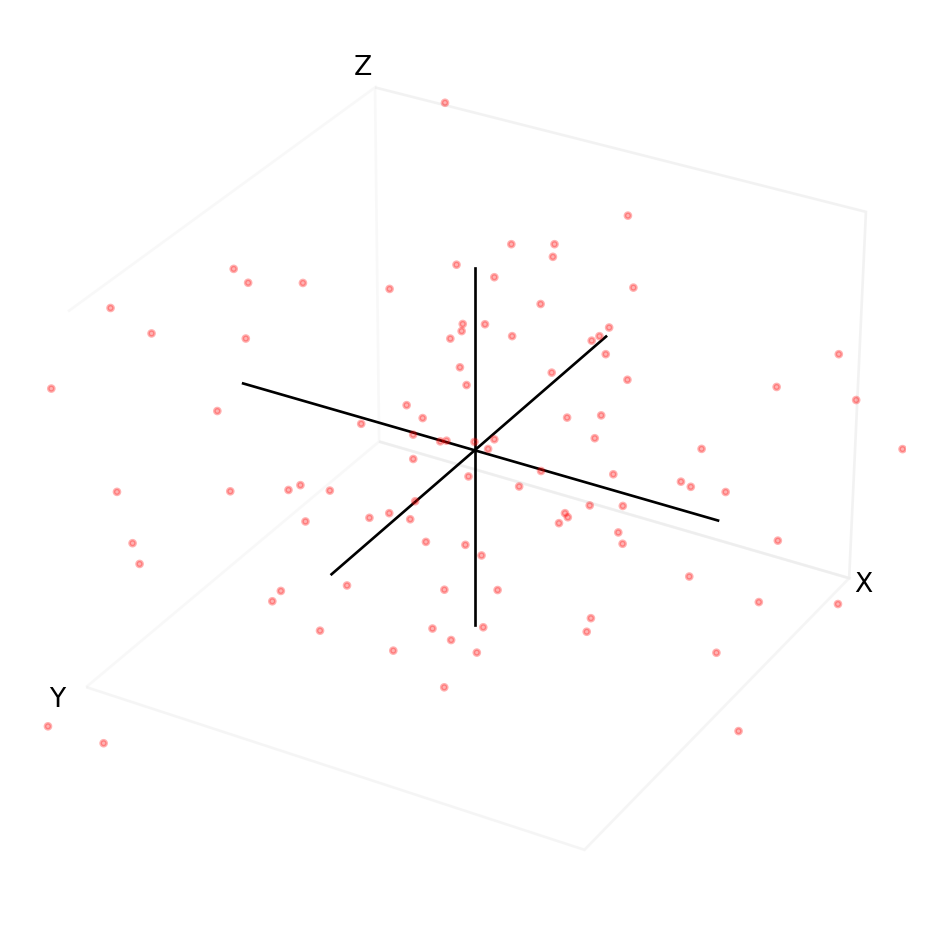

In [2]:
#| fig-align: "center"
#| fig-cap: "3D plot of random points"
#| label: fig-3d_random_points

num_points = 100
x = 6 * np.random.randn(num_points)
y = 6 * np.random.randn(num_points)
z = 6 * np.random.randn(num_points)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', facecolor='white')
ax.scatter(x, y, z, c='r', marker='o', alpha=0.3, s=5)

ax.set_xlabel('X', labelpad=-10)
ax.set_ylabel('Y', labelpad=-10)
ax.set_zlabel('Z', labelpad=-10)

ax.grid(False)

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

ax.xaxis._axinfo['juggled'] = (0, 0, 0)
ax.yaxis._axinfo['juggled'] = (1, 1, 1)
ax.zaxis._axinfo['juggled'] = (2, 2, 2)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.plot([-10, 10], [0, 0], [0, 0], color='k', linewidth=1)
ax.plot([0, 0], [-10, 10], [0, 0], color='k', linewidth=1)
ax.plot([0, 0], [0, 0], [-10, 10], color='k', linewidth=1)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.show()

Now let's say x, y and z represent real world features: physical human traits.

- `x = age`
- `y = height`
- `z = weight`

 The data would no longer be random. There are relationships between age,height, and weight. Additionally, some combinations of age, height and weight never occur in reality. You'll be hard-pressed to find a 300 kg 4-year-old measuring 50 cm tall. So, if we have good sources of data, the model will also tend to believe such combinations are not possible. There are underlying physiological rules defining the relationship. Those rules define a latent space.
 
Conversely, given two of these values, we can make an approximate guess at the third. If we can do that, then there likely exists a smaller dimensional space in which our data also resides, one that does not require all the features. If done correctly, it might only take 1 or 2 coordinates to describe any human by these traits.
 
The goal is to discover a structure that serves as our new coordinate system, allowing navigation with just two coordinates. Autoencoders, particularly the encoder portion, accomplish this by seeking a lower-dimensional latent space. The autoencoder's middle layer asserts the existence of a latent space of size $w$ and compels the network to find such a representation. Lacking this constraint, the middle layer would remain in its original high-dimensional space, merely copying the input and functioning as an identity transformation (multiplying everything by 1).

 @fig-height_weight_age demonstrates that the majority of points lie on or near a 2D latent space. By projecting these points onto the blue grid as close to their original positions as possible, we can create a 2-dimensional visualization. What the axes represent is no longer as simple as height, weight or age, but some combination of all of them. Due to this projection, the points won't precisely match their original locations, but they will be close. This process is analogous to the slightly blurred, imperfect image reconstruction from earlier on.


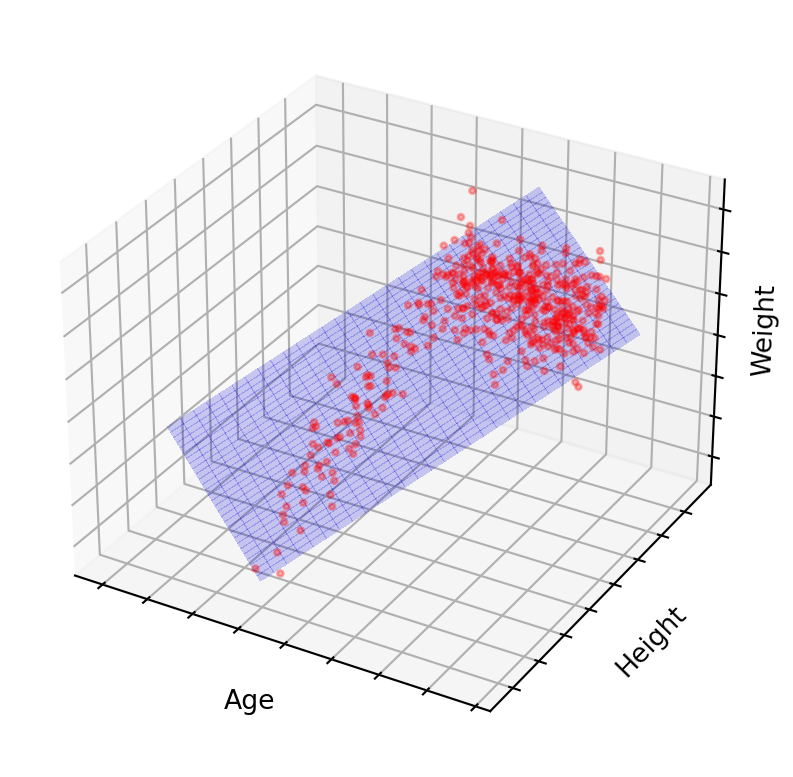

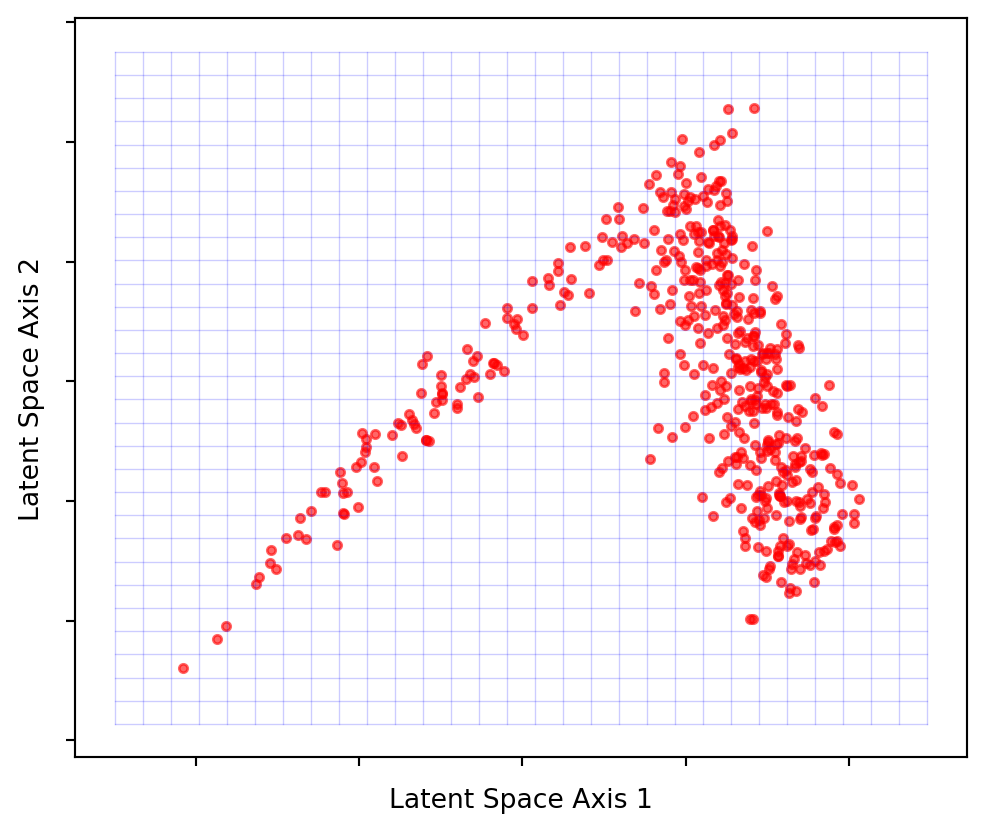

In [3]:
#| freeze: true
#| layout: [[1,1]]
#| label: fig-height_weight_age
#| fig-cap: "Visualisation of a Latent Space for height, weight and age in a population"
#| fig-subcap:
#|   - "Height vs Weight vs Age with Latent Space Overlay"
#|   - "Same data as (a) Projected onto Latent Space"
#| layout-valign: "bottom"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

def generate_data(num_points):
    age = np.random.randint(low=1, high=100, size=num_points)
    height = np.zeros(num_points)
    
    for i, a in enumerate(age):
        base_height = 50
        growth_factor = 6
        if a <= 20:
            growth_rate = a / 4.0
            height[i] = base_height + a * growth_factor  + np.random.normal(loc=0, scale=20)
        else:
            max_height = base_height + 20 * growth_factor
            height[i] = max_height + np.random.normal(loc=0, scale=5)
    
    weight = height * 0.5 + 1.2 * np.random.normal(loc=0, scale=10, size=num_points)
    data = np.column_stack((age, height, weight))
    return data

data = generate_data(500)

pca = PCA(n_components=2)
latent_space = pca.fit_transform(data)

grid_size = 30
x_grid, y_grid = np.meshgrid(np.linspace(latent_space[:, 0].min(), latent_space[:, 0].max(), grid_size),
                             np.linspace(latent_space[:, 1].min(), latent_space[:, 1].max(), grid_size))

latent_grid = np.column_stack((x_grid.ravel(), y_grid.ravel()))

projected_grid = pca.inverse_transform(latent_grid)
age_grid, height_grid, weight_grid = projected_grid[:, 0].reshape(grid_size, grid_size), projected_grid[:, 1].reshape(grid_size, grid_size), projected_grid[:, 2].reshape(grid_size, grid_size)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:,0], data[:,1], data[:,2], c='r', marker='o', alpha=0.3, s=5, label='Original Data')
ax.plot_surface(age_grid, height_grid, weight_grid, alpha=0.2, color='blue', linewidth=0, antialiased=False, label='Latent Space')

ax.set_xlabel('Age', labelpad=-5)
ax.set_ylabel('Height', labelpad=-5)
ax.set_zlabel('Weight', labelpad=-10)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(-latent_space[:, 0], -latent_space[:, 1], c='r', marker='o', alpha=0.6, s=10)

x_min, x_max = latent_space[:, 0].min(), latent_space[:, 0].max()
y_min, y_max = latent_space[:, 1].min(), latent_space[:, 1].max()
margin = 0.1
x_range = x_max - x_min
y_range = y_max - y_min

x_grid, y_grid = np.meshgrid(np.linspace(x_min - margin * x_range, x_max + margin * x_range, 30),
                             np.linspace(y_min - margin * y_range, y_max + margin * y_range, 30))

for i in range(x_grid.shape[0]):
    ax.plot(-x_grid[i, :], -y_grid[i, :], c='blue', alpha=0.2, linewidth=0.5)
    ax.plot(-x_grid[:, i], -y_grid[:, i], c='blue', alpha=0.2, linewidth=0.5)

ax.set_xlabel('Latent Space Axis 1')
ax.set_ylabel('Latent Space Axis 2')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

Latent spaces will not be so easy to visualise when it comes to complex data, and won't be a flat plane. This is why we might want the autoencoder to figure out the shape for us.

## Dimensionality reduction reveals latent spaces

When data is cleverly compressed, the reduced dimension space is a latent space, and autoencoders can find these latent spaces for us.

Consider an image passed through our autoencoder model. We can interrupt the processing when it arrives at the middle layer, this allows us to capture the 2-dimensional latent representation of the image. In essence, each image becomes represented by just two coordinates within this latent space.

![Autoencoder Diagram with Decoder Removed](../media/images/Autoencoder_schema_with_example_2d_latent_sliced.png){width="450" #fig-autoencoder_sliced}

By processing multiple images through our autoencoder, we're left with a set of 2D coordinates, each representing an individual image. Visualizing these coordinates within the latent space (as seen in @fig-tsne_mnist) unveils the underlying structure of our data. This process is akin to revealing the topography of an invisible landscape by sprinkling dust - each dust particle representing an image - and observing the surface that is created.

In [4]:
#| eval: false
from pathlib import Path
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.manifold import TSNE
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm

train_ds = torchvision.datasets.MNIST(
    "../data",
    train=True,
    download=True,
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(),
        ]
    ),
)

test_ds = torchvision.datasets.MNIST(
    "../data",
    train=False,
    download=True,
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(),
        ]
    ),
)

batch_size = 128
train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=False)


class AutoEncoder(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 2),
        )

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(2, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid(),
        )

    def forward(self, x):
        enc = self.encoder(x)
        dec = self.decoder(enc)
        return dec


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoEncoder()
model_c = torch.compile(model)
model_c.to(device)
loss_f = torch.nn.MSELoss()

opt = torch.optim.Adam(model.parameters(), lr=2e-3)

epochs = 100
out = []
losses = []

torch._dynamo.config.suppress_errors = True


def train_model():
    model_c.train()

    for epoch in tqdm(range(epochs)):
        for img, _ in train_loader:
            img = img.reshape(-1, 28 * 28).to(device)

            reconstructed = model_c(img)
            loss = loss_f(reconstructed, img)

            opt.zero_grad()
            loss.backward()
            opt.step()

            losses.append(loss.item())
            print(f"Loss: {loss.item()}")
        out.append((epoch, img, reconstructed))


model_name = "model_weights12-2dim.pt"
if Path(model_name).exists():
    model.load_state_dict(torch.load(model_name))
else:
    train_model()
    torch.save(model.state_dict(), model_name)

encoded_data = []
labels = []
original_images = []
c = 0
for i, (img, label) in tqdm(enumerate(test_loader)):
    c += 1
    img_flat = img.reshape(-1, 28 * 28)
    out = model.encoder(img_flat)
    encoded_data.extend(out.detach().cpu().numpy())
    labels.extend(label.numpy())
    original_images.extend(img_flat.cpu().numpy())
    if c > 4:
        break

fig, ax = plt.subplots()

image_size = 28
padding = 0.03

encoded_data = np.array(encoded_data)

x_min, x_max = np.min(encoded_data[:, 0]), np.max(encoded_data[:, 0])
y_min, y_max = np.min(encoded_data[:, 1]), np.max(encoded_data[:, 1])
x_range = x_max - x_min
y_range = y_max - y_min

shift_x = padding / 2
shift_y = padding / 2
man_shift = 0.1 

for idx, (x, y) in enumerate(encoded_data):
    x_pos = (x - x_min) / x_range - shift_x - man_shift
    y_pos = (y - y_min) / y_range - shift_y
    image = original_images[idx].reshape(28, 28)
    ab = plt.Axes(fig, [x_pos, y_pos, padding, padding], frame_on=False)
    ab.set_axis_off()
    fig.add_axes(ab)
    ab.imshow(image, cmap="gray_r")

ax.set_xticks([])
ax.set_yticks([])

plt.show()

![2D Representation of latent dimension with original data projected onto it (source: Open code cell above for the code used to create this plot)](../media/images/mnist_2D_rep.png){#fig-tsne_mnist width="450"}

A noteworthy observation is how similar digits cluster together in the visualized latent space. This demonstrates the model’s ability to discern patterns and similarities between different digits within its middle layer.

An autoencoders' ability to learn essential features from the input data holds significant value. It is why we can compress the information. Without using an autoencoder, finding such latent spaces would be quite challenging.

Hopefully, the main concepts are now clear enough that we can start building a deeper, more technical understanding.
In Part 2, we will delve more into implementation of autoencoder-based models to put the concepts discussed here with a more interesting example.